In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import dateutil.parser import parse
# import collections import Counter 
from collections import Counter

In [2]:
nf_data=pd.read_csv(r'D:\Projects\Datasets\netflix.csv')

In [3]:
nf_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# To check Shape of data set
nf_data.shape  

(8807, 12)

In [5]:
# To check the columns
nf_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#Changing column name 'Listed_in' to geners to look attractive
nf_data.rename(columns = {'listed_in':'geners'}, inplace = True)
nf_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'geners', 'description'],
      dtype='object')

In [7]:
#  Validating Duplicate Records
nf_data=nf_data.drop_duplicates()
nf_data.shape
# No Duplicate Values are Prtesent

(8807, 12)

In [8]:
# Missing Data Analysis
# Total Missing values
total_null=nf_data.isnull().sum().sort_values(ascending=False)
# Converting missing value to Percent
percentage=(nf_data.isnull().sum()/len(nf_data)*100).sort_values(ascending=False)
# Total values count after missing
Total=nf_data.count().sort_values(ascending=True)
print("Total records =", nf_data.shape[0])
#  concatinating All in dataframe
missing_data=pd.concat([Total,total_null,percentage.round(2)],axis=1,keys=['Remaing','Total Missing','In Percentage'])
missing_data.head(10)

Total records = 8807


,Remaing,Total Missing,In Percentage
director,6173,2634,29.91
country,7976,831,9.44
cast,7982,825,9.37
date_added,8797,10,0.11
rating,8803,4,0.05
duration,8804,3,0.03
show_id,8807,0,0.00
type,8807,0,0.00
title,8807,0,0.00
release_year,8807,0,0.00


In [9]:
# Handling Missing Value
# Handling Missing - rating
# Applying imputation technique
nf_data['rating'].replace(to_replace = np.nan, value = 'NR',inplace=True)

In [10]:
# Handling Missing - Country
# Applying Fillna technique
nf_data['country'] = nf_data['country'].fillna(nf_data['country'].mode()[0])

In [11]:
# Handling Missing - duration
# Applying imputation technique
nf_data['duration'].replace(to_replace = np.nan, value='NR',inplace=True)

In [12]:
# Unique Values Count for each Attribute
nf_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         221
geners           514
description     8775
dtype: int64

In [13]:
# Dropping show Id as it is just for reference and of no use
nf_data=nf_data.drop('show_id',axis=1)

In [14]:
nf_data.nunique()
# description=(8807-8875=32) so 32 movies have the same description that may be because the same movies being released in diff language

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         221
geners           514
description     8775
dtype: int64

In [15]:
# Unique values(names) are checked 
nf_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
nf_data['rating'].unique()
# In this 3 records are actually part of duration 74,84,66mins

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
# Using imputation technique to replace the duration value with 74,84,66mins whic were found in ratings
null_columns=nf_data.columns[nf_data.isnull().any()]
nf_data[nf_data['duration'].isnull()][null_columns]

,director,cast,date_added


In [18]:
nf_data.loc[nf_data['rating'] == '66 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,geners,description
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NR,Movies,The comic puts his trademark hilarious/thought...


In [19]:
nf_data.loc[nf_data['rating'] == '84 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,geners,description
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NR,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [20]:
nf_data.loc[nf_data['rating'] == '74 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,geners,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NR,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [21]:
# Updated the Correct Duration
nf_data.loc[5541,'duration'] = '74 min'
nf_data.loc[5794,'duration'] = '84 min'
nf_data.loc[5813,'duration'] = '66 min'


In [22]:
nf_data.loc[nf_data['duration'] == '74 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,geners,description
423,Movie,Chhota Bheem: Master of Shaolin,Rajiv Chilaka,"Pooja Punabi, Mausam, Julie Tejwani, Rupa Bhim...",United States,"July 22, 2021",2011,TV-Y7,74 min,Children & Family Movies,Summoned by a monk to help reclaim a temple fr...
757,Movie,Breaking Boundaries: The Science Of Our Planet,Jonathan Clay,"David Attenborough, Johan Rockström",United States,"June 4, 2021",2021,TV-PG,74 min,Documentaries,David Attenborough and scientist Johan Rockstr...
1198,Movie,RebellComedy: Straight Outta the Zoo,Ladislaus Kiraly,"Khalid Bounouar, Alain Frei, Babak Ghassim, Be...",Germany,"March 16, 2021",2021,TV-MA,74 min,Stand-Up Comedy,The comics of RebellComedy take the stage and ...
1719,Movie,We Are All For The Fatherland,NaN,NaN,"Lebanon, Canada, France","November 11, 2020",1979,TV-14,74 min,"Documentaries, International Movies","After the 1978 Israeli invasion of Lebanon, ch..."
3265,Movie,El sendero de la anaconda,Alessandro Angulo,"Wade Davis, Martin von Hildebrand",Colombia,"November 15, 2019",2019,TV-14,74 min,"Documentaries, International Movies","In the most remote areas of the Amazon jungle,..."
3278,Movie,SunGanges,Valli Bindana,Naseeruddin Shah,"India, United States","November 15, 2019",2018,TV-14,74 min,"Documentaries, International Movies",A trio of filmmakers treks across India to exp...
3761,Movie,Belmonte,Federico Veiroj,"Gonzalo Delgado, Olivia Molinaro Eijo, Jeannet...","Uruguay, Spain, Mexico","June 7, 2019",2018,TV-MA,74 min,"Dramas, Independent Movies, International Movies",An artist muddles through a midlife crisis whi...
4123,Movie,ReMastered: The Two Killings of Sam Cooke,Kelly Duane de la Vega,Sam Cooke,United States,"February 8, 2019",2019,TV-MA,74 min,"Documentaries, Music & Musicals",While Sam Cooke rose to stardom as a soul sing...
4152,Movie,Bhasmasur,Nishil Sheth,"Imran Rasheed, Mittal Chouhan, Trimala Adhikar...",India,"January 29, 2019",2017,TV-14,74 min,"Dramas, Independent Movies, International Movies","In this heart-wrenching coming-of-age story, a..."
4482,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,"October 23, 2018",2018,TV-MA,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."


In [23]:
# Checking missing data again to make sure
total_null=nf_data.isnull().sum().sort_values(ascending=False)
# Converting missing value to Percent
percentage=(nf_data.isnull().sum()/len(nf_data)*100).sort_values(ascending=False)
# Total values count after missing
Total=nf_data.count().sort_values(ascending=True)
#  concatinating All in dataframe
missing_data=pd.concat([Total,total_null,percentage.round(2)],axis=1,keys=['Remaing','Total Missing','In Percentage'])
missing_data.head(10)

,Remaing,Total Missing,In Percentage
director,6173,2634,29.91
cast,7982,825,9.37
date_added,8797,10,0.11
type,8807,0,0.00
title,8807,0,0.00
country,8807,0,0.00
release_year,8807,0,0.00
rating,8807,0,0.00
duration,8807,0,0.00
geners,8807,0,0.00


In [24]:
# Using imputation technique to replace 'duration' value to 'NR' which were present in 'rating'
nf_data['rating'].replace({'74 min':'NR'},inplace=True)
nf_data['rating'].replace({'84 min':'NR'},inplace=True)
nf_data['rating'].replace({'66 min':'NR'},inplace=True)

In [25]:
# Result after imputation
nf_data[nf_data["rating"] == 'NR']

,type,title,director,cast,country,date_added,release_year,rating,duration,geners,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...
5971,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...
5987,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",2015,NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...
...,...,...,...,...,...,...,...,...,...,...,...
8674,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...
8682,Movie,Vizontele Tuuba,Yılmaz Erdoğan,"Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Cez...",Turkey,"March 10, 2017",2004,NR,106 min,"Comedies, Dramas, International Movies","With civil war looming, a TV-obsessed Turkish ..."
8727,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",NaN,"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...
8748,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p..."


In [26]:
nf_data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [27]:
# DATA PREPARATION



In [28]:
# Data Validation
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   geners        8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [29]:
# date_added is a datetime data type, hence need to update the dtype
nf_data["date_added"]=pd.to_datetime(nf_data["date_added"])

In [30]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   geners        8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [31]:
# new features added - "year added" from date_added feature
# new features added - "month added" from date_added feature
# new features added - "day added" from date_added feature
# new features added - "weekend added" from date_added feature
# new features added - rating category based on whether the content is suitable for Kids,Teenager and Adults
# new features added - "season count " for each TV shows

In [32]:
# Creating the copy before manupulating the date time info
nf_date=nf_data.copy()

In [33]:
nf_date.shape

(8807, 11)

In [34]:
# New features adding

nf_date["year_added"] = nf_date["date_added"].dt.year
# nf_date["year_added"] = nf_date["year_added"].astype("int64")
nf_date["month_added"] = nf_date["date_added"].dt.month
nf_date["day_added"] = nf_date["date_added"].dt.day


In [35]:
nf_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      6173 non-null   object        
 3   cast          7982 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8797 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   geners        8807 non-null   object        
 10  description   8807 non-null   object        
 11  year_added    8797 non-null   float64       
 12  month_added   8797 non-null   float64       
 13  day_added     8797 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 1.3+ MB


In [36]:
# New features adding to "ratings_cat" category
# Classifying ratings into three categories(Kids,Teen,Adults)

nf_data['ratings_cat']=nf_data['rating']

In [37]:
# added values to the keys i.e:'Kids','Adults','Teenagers'
# then replaced with ratings which the column was added 
custom_rating ={'TV-Y':'Kids','TV-Y7':'Kids','TV-G':'Kids','PG':'Kids','TV-PG':'Kids','TV-Y7-FV':'Kids','G':'Kids',
               'PG-13':'Teenagers','TV-14':'Teenagers',
                'R':'Adults','TV-MA':'Adults','NC-17':'Adults','NR':'Adults','UR':'Adults'}
nf_data['ratings_cat'] = nf_data['rating'].replace(to_replace = custom_rating)

In [38]:
nf_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,geners,description,ratings_cat
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teenagers
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults


In [39]:
# Season Count for each TV shows
nf_data['season_count'] = nf_data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "",axis=1)
nf_data['duration'] = nf_data.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "",axis=1)

In [40]:
# Analyzing stats about each feature added such as count,min ,max and mean
nf_date.describe()


,release_year,year_added,month_added,day_added
count,8807.000000,8797.000000,8797.000000,8797.000000
mean,2014.180198,2018.871888,6.654996,12.497329
std,8.819312,1.574243,3.436554,9.887551
min,1925.000000,2008.000000,1.000000,1.000000
25%,2013.000000,2018.000000,4.000000,1.000000
50%,2017.000000,2019.000000,7.000000,13.000000
75%,2019.000000,2020.000000,10.000000,20.000000
max,2021.000000,2021.000000,12.000000,31.000000


In [41]:
# Netflix has 25% of movies and Tv shows that were released within the last two years 
# About 75% of netflix content consits of movies and Tv shows released after 2013
# Data from netflix shows that new trend movies or Tv shows are more prevalent
# for more subscribers, Netflix should invest in classic Movies and Tv shows

In [42]:

# Univariante Analysis



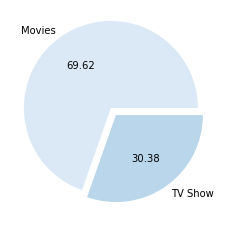

In [43]:
# Movies & TV shows - Distributed
data= nf_data.groupby("type")['type'].count()

explode=(0.10,0)
labels = ['Movies','TV Show']
colors = sns.color_palette("Blues")
plt.pie(data, labels=labels,colors = colors, autopct = '%0.2f', explode = explode)
plt.show()


In [44]:
# Netflix has 69.92% of its content as movies
# Movies are clearly more popular on netflix than TV shows

Text(0.5, 0, 'year -> (Movies added to NetFlix)')

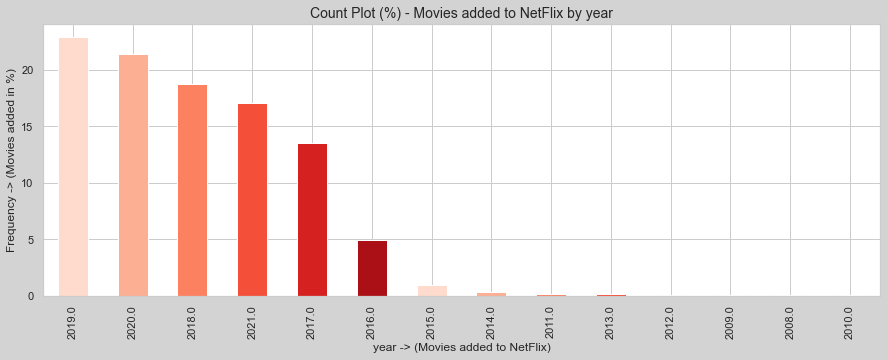

In [45]:
# Checking number of new contents added yearly

fig=plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count=(nf_date['year_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.title('Count Plot (%) - Movies added to NetFlix by year',fontsize=14)
plt.ylabel('Frequency -> (Movies added in %)', fontsize=12)
plt.xlabel('year -> (Movies added to NetFlix)', fontsize=12)

Text(0.5, 0, 'year -> (Movies added to NetFlix)')

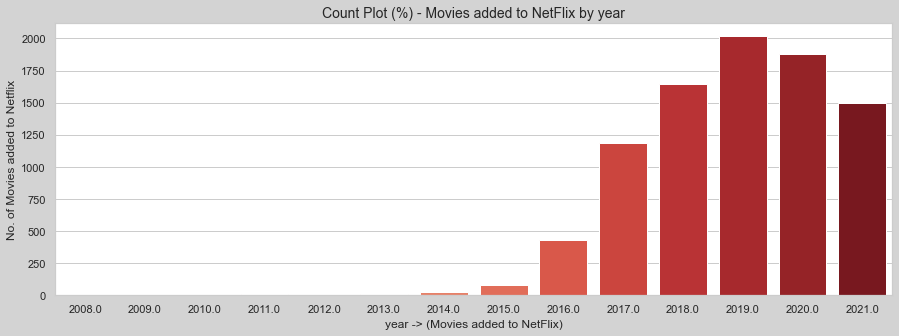

In [46]:
fig=plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=nf_date,x='year_added',palette = 'Reds')
plt.title('Count Plot (%) - Movies added to NetFlix by year',fontsize=14)
plt.ylabel('No. of Movies added to Netflix', fontsize=12)
plt.xlabel('year -> (Movies added to NetFlix)', fontsize=12)

In [47]:
# According to the above graph ,Netflix has started adding content since 2014
# The popularity of OTT has boomed in the last 5 years, So we're seeing a dramatic increase in content being added
# there were 2000(23%) Movies and Tv shows added in the year 2019(Highest Until date)


Text(0.5, 0, 'month -> (Movies added to NetFlix)')

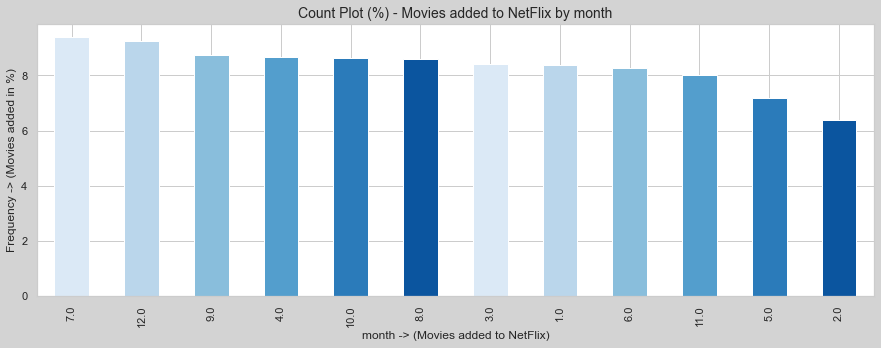

In [48]:
fig=plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count=(nf_date['month_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Blues'))
plt.title('Count Plot (%) - Movies added to NetFlix by month',fontsize=14)
plt.ylabel('Frequency -> (Movies added in %)', fontsize=12)
plt.xlabel('month -> (Movies added to NetFlix)', fontsize=12)

Text(0.5, 0, 'month -> (Movies added to Netflix)')

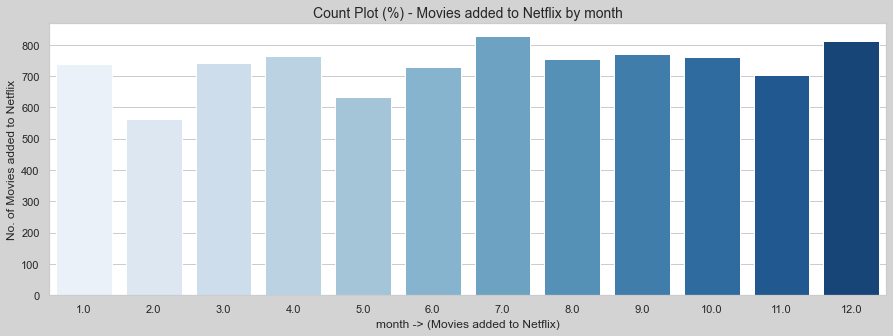

In [49]:
# Each Month we see consistent addition
# Checking number of content added monthly
fig=plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=nf_date,x='month_added',palette = 'Blues')
plt.title('Count Plot (%) - Movies added to Netflix by month',fontsize=14)
plt.ylabel('No. of Movies added to Netflix', fontsize=12)
plt.xlabel('month -> (Movies added to Netflix)', fontsize=12)

Text(0.5, 0, 'Date on which Movies added to Netflix)')

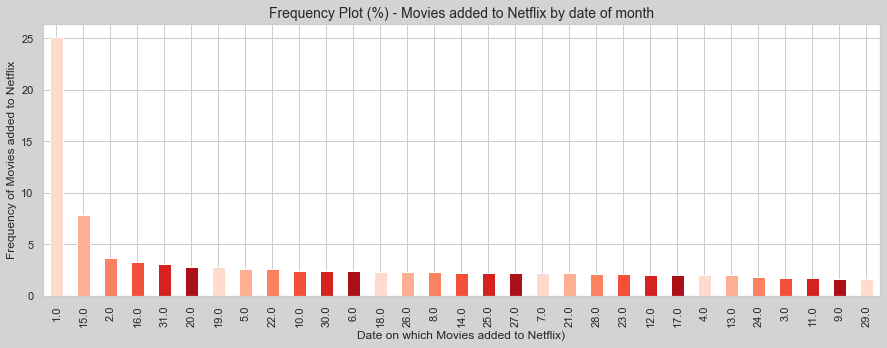

In [50]:
# Checking when should be new content added to the site

fig=plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
count = (nf_date['day_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.title('Frequency Plot (%) - Movies added to Netflix by date of month',fontsize=14)
plt.ylabel('Frequency of Movies added to Netflix', fontsize=12)
plt.xlabel('Date on which Movies added to Netflix)', fontsize=12)

# It was evident that 1st of every month was the most content was added

In [51]:
# Distribution of Release Year

bins=[1941,2000,2011,2014,2016,2018,2020,2021]
nf_date_v1 = nf_date.groupby(pd.cut(nf_date['release_year'],bins=bins)).release_year.count()
bins=[1941,2000,2011,2013,2021]
nf_date_v2 = nf_date.groupby(pd.cut(nf_date['release_year'],bins=bins)).release_year.count()


In [52]:
nf_date_bin=nf_date_v1.to_frame()
nf_date_bin.rename(columns = {"release_year":"count"},inplace=True)
nf_date_bin1=nf_date_v2.to_frame()
nf_date_bin1.rename(columns = {"release_year":"count"},inplace=True)

<AxesSubplot:title={'center':'Bar Plot - based on release_year of Movies & TV shows'}, xlabel='release_year', ylabel='count'>

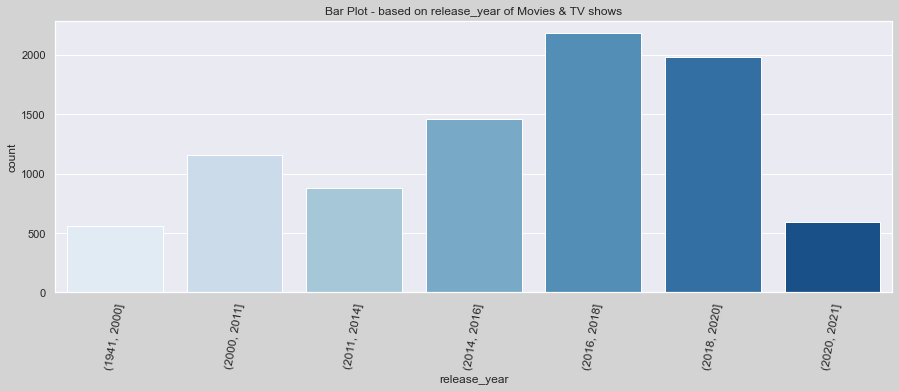

In [53]:
fig=plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
plt.title('Bar Plot - based on release_year of Movies & TV shows',fontsize=12)
plt.ylabel('Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year', fontsize=12)
plt.xticks(rotation = 80, fontsize=12)
sns.barplot(x=nf_date_bin.index,y='count',data=nf_date_bin,palette='Blues')

In [54]:
# This above graph shows 2016-1018 Most Movies and TV shows released

<AxesSubplot:title={'center':'Bar Plot - based on release_year of Movies & TV shows'}, xlabel='release_year', ylabel='count'>

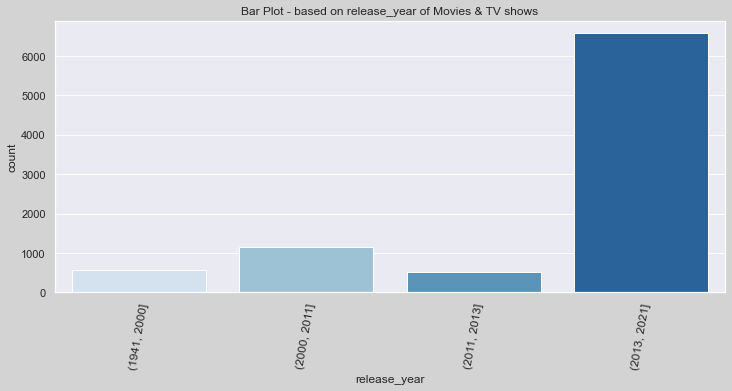

In [55]:
fig=plt.figure(figsize=(12,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
plt.title('Bar Plot - based on release_year of Movies & TV shows',fontsize=12)
plt.ylabel('Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year', fontsize=12)
plt.xticks(rotation = 80, fontsize=12)
sns.barplot(x=nf_date_bin1.index,y='count',data=nf_date_bin1,palette='Blues')

# Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above
# Added content release date ranging from 2014 till now for 75% of movies and Tv shows.This shows netflix encourages content creaters to add new content in the flatform
# New content creators have a lot of opportinutes to share their content of netflix

In [126]:
# Heat Map for Correlation i.e Between year, month,day of release
corr=nf_date.corr()
corr


,release_year,year_added,month_added,day_added
release_year,1.000000,0.111531,-0.039179,0.140126
year_added,0.111531,1.000000,-0.160421,0.045901
month_added,-0.039179,-0.160421,1.000000,0.020658
day_added,0.140126,0.045901,0.020658,1.000000


<AxesSubplot:>

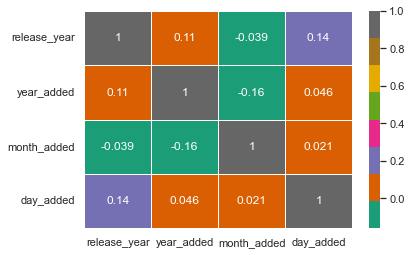

In [123]:
sns.heatmap(corr, annot=True, cmap='Dark2', linewidths=1)

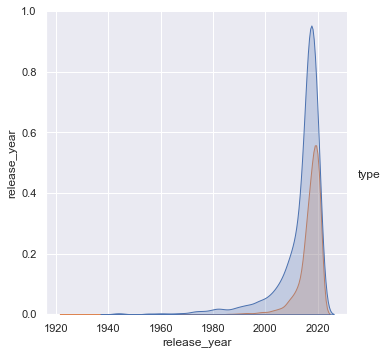

In [161]:
# Tv Shows and Movies release Year
sns.pairplot(data=nf_data, hue='type', height=5)
plt.show()


In [56]:
# Identifing how content is distributed based on maturity level - Kids,teens, adults



(array([0, 1, 2]),
 [Text(0, 0, 'Adults'), Text(1, 0, 'Teenagers'), Text(2, 0, 'Kids')])

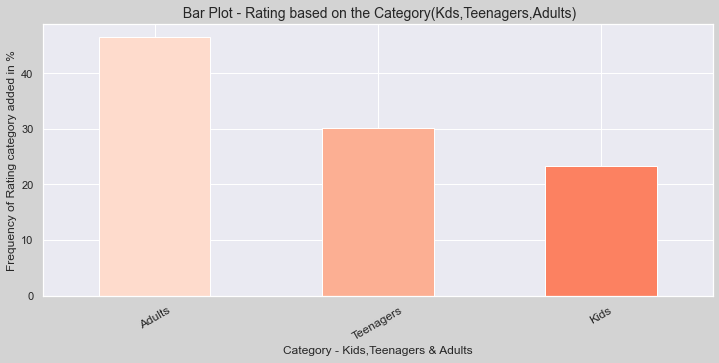

In [57]:
fig=plt.figure(figsize=(12,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
count = (nf_data['ratings_cat'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Reds'))
plt.title(' Bar Plot - Rating based on the Category(Kds,Teenagers,Adults)',fontsize=14)
plt.ylabel('Frequency of Rating category added in %', fontsize=12)
plt.xlabel('Category - Kids,Teenagers & Adults', fontsize=12)
plt.xticks(rotation = 30,fontsize=12)

Text(0.5, 0, 'Category - Kids,Teenagers & Adults')

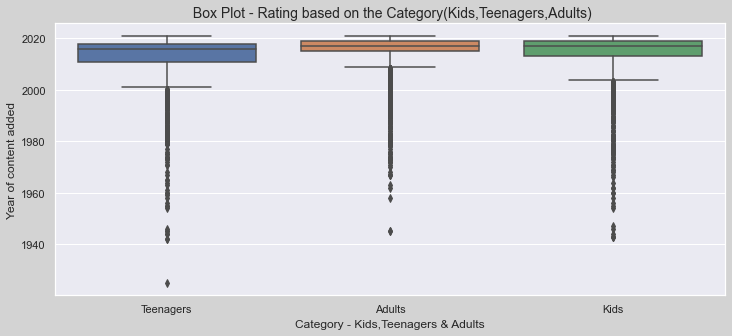

In [148]:
# Boxplot
fig=plt.figure(figsize=(12,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
# count = (nf_data['ratings_cat'].value_counts(normalize=True)*100)
sns.boxplot(data=nf_data, x="ratings_cat", y="release_year")
plt.title(' Box Plot - Rating based on the Category(Kids,Teenagers,Adults)',fontsize=14)
plt.ylabel('Year of content added', fontsize=12)
plt.xlabel('Category - Kids,Teenagers & Adults', fontsize=12)
# plt.xticks(rotation = 30,fontsize=12)

Text(0.5, 0, 'Category')

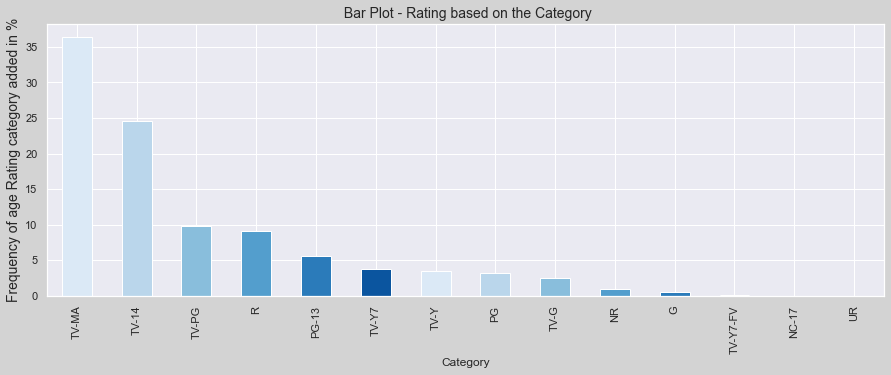

In [103]:
fig=plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
count = (nf_data['rating'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Blues'))
plt.title(' Bar Plot - Rating based on the Category',fontsize=14)
plt.ylabel('Frequency of age Rating category added in %', fontsize=14)
plt.xlabel('Category', fontsize=12)


In [59]:
# On Netflix 48% of the content (Movies and Tv shows) is for aduts
# According to the Above graph, more than 60% of Tv shows content is not suitable for kids
#  More Kid friendly content can increase more Subscribers

In [60]:
# GENRES


In [61]:
geners = ", ".join(nf_data['geners']).split(", ")
geners

genre_cnt = Counter()
for genre in geners:
    genre_cnt[genre] +=1
    
top_20_genre = genre_cnt.most_common(20)
nf_geners = pd.DataFrame (top_20_genre, columns = ['Geners','Geners Count'])
nf_geners.head()

,Geners,Geners Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


<AxesSubplot:title={'center':'Top 20 Geners Count'}, xlabel='Geners', ylabel='Geners Count'>

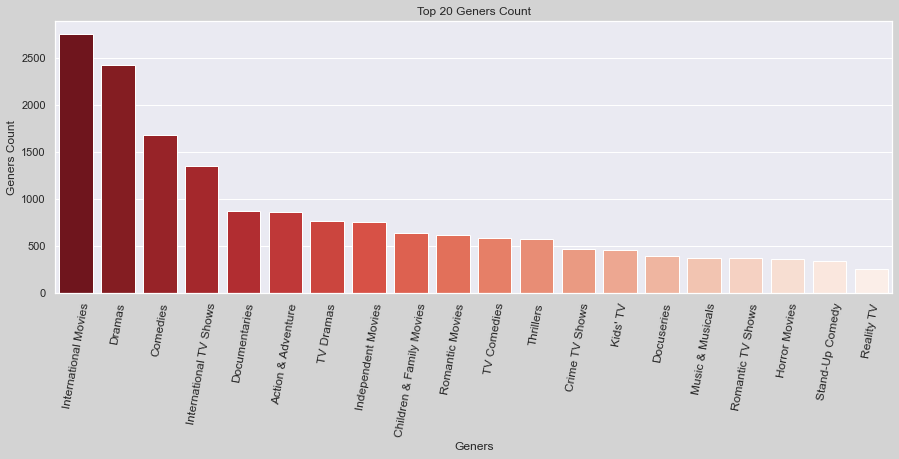

In [62]:
# Which Geners Movies Contribute more to Netflix
fig=plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
plt.title('Top 20 Geners Count',fontsize=12)
plt.ylabel('Count of Movies & TV shows by Geners', fontsize=12)
plt.xlabel('Geners', fontsize=12)
plt.xticks(rotation = 80, fontsize=12)
sns.barplot(x='Geners',y='Geners Count',data=nf_geners,palette='Reds_r')

In [63]:
# As can be seen from the above graph, " International Movies & Dramas" are the top Gener contributors
# Their contribution Most in Revenue of Netflix

In [64]:
# Top 20 Contribution to the Netflix content

# Top 20 actors who have contributed to the most Movies to Netflix content
# Top 20 actors who have contributed to the most TV shows to Netflix content

In [65]:
# Top 20 actors who have contributed to the most Movies to Netflix content

nf_cast = nf_data.groupby(["type","cast"])["cast"].count().unstack('type')
nf_cast.coloumns = ['Movies','TV Show']
nf_Movie_cast = nf_cast[nf_cast["Movie"].notnull()].iloc[:,:1]
nf_Movie_cast.reset_index(level='cast',inplace=True)
nf_Movie_cast.head()

C:\Users\archa\AppData\Local\Temp/ipykernel_7116/3815432648.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  nf_cast.coloumns = ['Movies','TV Show']


type,cast,Movie
0,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",1.0
1,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",1.0
2,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",1.0
3,A.R. Rahman,1.0
4,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",1.0


In [66]:
movieCast = ", ".join(nf_Movie_cast['cast']).split(", ")
movieCast
cnt_movieCast=Counter()

for cast in movieCast:
    cnt_movieCast[cast] += 1
    
movieCast = cnt_movieCast.most_common(20)
nf_Movie_cast = pd.DataFrame (movieCast, columns = ['Actor','Actor Count'])
nf_Movie_cast.head()

,Actor,Actor Count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30


<AxesSubplot:title={'center':'Top Actor count for Movies'}, xlabel='Actor', ylabel='Actor Count'>

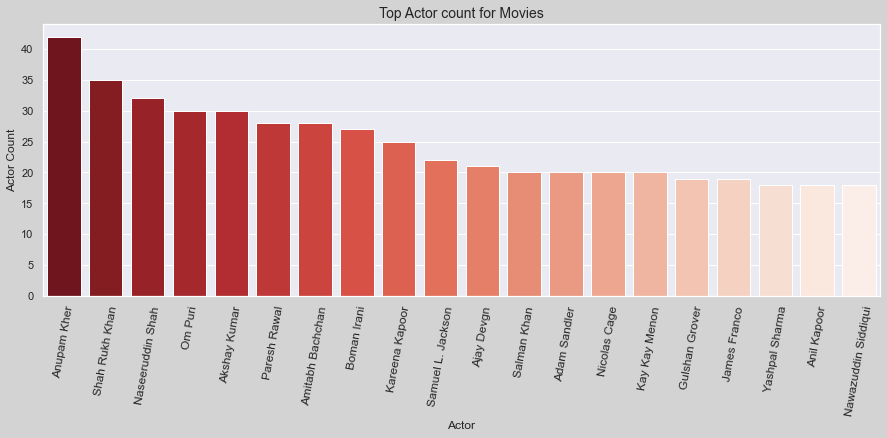

In [67]:
fig=plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
plt.title('Top Actor count for Movies',fontsize=14)
plt.ylabel('Count of Movies bt Actor', fontsize=12)
plt.xlabel('Actor Names', fontsize=12)
plt.xticks(rotation = 80, fontsize=12)
sns.barplot(x='Actor',y='Actor Count',data = nf_Movie_cast,palette='Reds_r')

In [68]:
# Based on the above data, the majority of Netflix movies are starring Indian Actors (No1:Anupam Kher)

In [69]:
# Top 20 actors who have contributed to the most TV shows to Netflix content

nf_tv_show_cast = nf_cast[nf_cast["TV Show"].notnull()].iloc[:,1:2]
nf_tv_show_cast.reset_index(level='cast',inplace=True)
tv_show_cast = ", ".join(nf_tv_show_cast['cast']).split(", ")
tv_show_cast
cnt_tv_show_cast=Counter()

for cast in tv_show_cast:
    cnt_tv_show_cast[cast] += 1
    
tv_show_cast = cnt_tv_show_cast.most_common(20)
nf_tv_show_cast = pd.DataFrame (tv_show_cast, columns = ['Actor','Actor Count'])
nf_tv_show_cast.head()

,Actor,Actor Count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Junichi Suwabe,17
3,Daisuke Ono,17
4,Ai Kayano,17


<AxesSubplot:title={'center':'Top Actor count for TV Shows'}, xlabel='Actor', ylabel='Actor Count'>

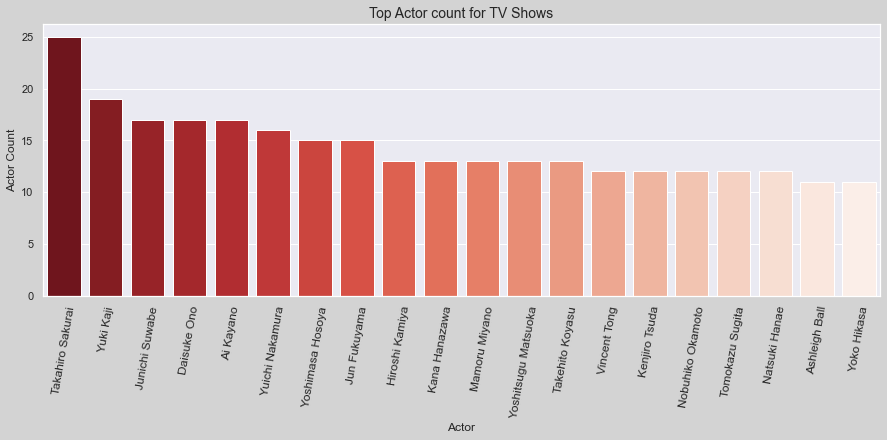

In [70]:
fig=plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
plt.title('Top Actor count for TV Shows',fontsize=14)
plt.ylabel('Count of TV Shows by Actor', fontsize=12)
plt.xlabel('Actor Names', fontsize=12)
plt.xticks(rotation = 80, fontsize=12)
sns.barplot(x='Actor',y='Actor Count',data = nf_tv_show_cast,palette='Reds_r')

In [71]:
# Above graph says In Tv shows,there was a mix of stars from around the world


In [72]:
# Distribution of Movie Duration


In [73]:
nf_data_mv=nf_data[nf_data["type"] == "Movie"]
nf_data_mv['duration'] = nf_data_mv['duration'].fillna(0.0).astype(float)

C:\Users\archa\AppData\Local\Temp/ipykernel_7116/2002613381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_data_mv['duration'] = nf_data_mv['duration'].fillna(0.0).astype(float)


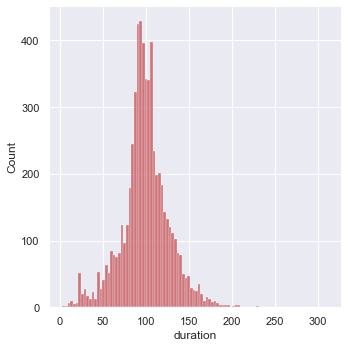

In [74]:
sns.displot(data=nf_data_mv,x='duration',bins=100,color="r")

In [75]:
# No. of Seasons per TV shows

nf_season_cnt = nf_data['season_count'].value_counts().reset_index()
nf_season_cnt = nf_season_cnt.rename(columns = {'season_count' : "count", "index" : 'season'})
nf_season_cnt.loc[0,'season'] = 0
nf_season_cnt.head()

,season,count
0,0,6131
1,1,1793
2,2,425
3,3,199
4,4,95


Text(0.5, 0, 'No. of Seasons')

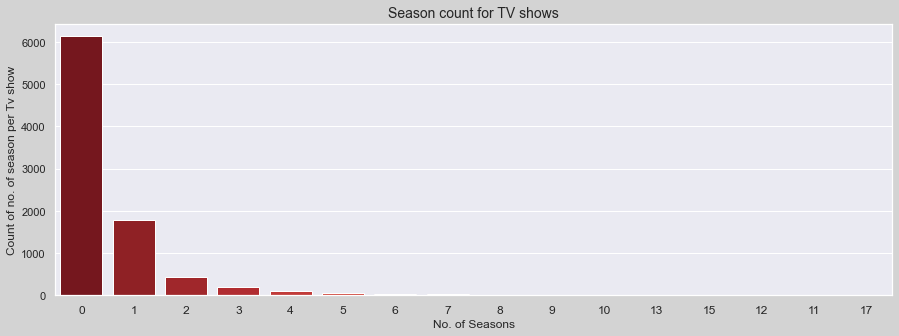

In [76]:
# Graph of No. of Seasons per TV shows
fig=plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
fig.set_facecolor("lightgrey")
plt.title('Season count for TV shows',fontsize=14)
plt.xticks(rotation = 0, fontsize=12)
sns.barplot(x='season',y='count',data = nf_season_cnt,palette='Reds_r')
plt.ylabel('Count of no. of season per Tv show', fontsize=12)
plt.xlabel('No. of Seasons', fontsize=12)



In [77]:
# Maximun No of Tv shows are 0 season

Text(0.5, 1.0, 'Movies and TV Shows added added to Netflix by date ')

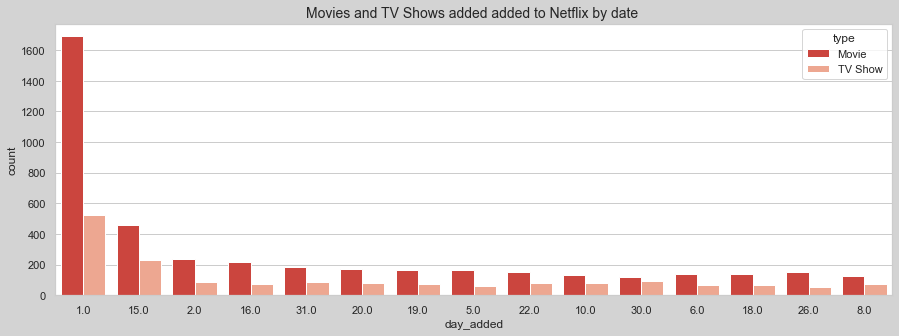

In [78]:
# Bi- Varient Analysis
# As we have seen earlier that it was evident that 1st of every moth was when the most content was added.Now it make sense to understand how is the distribution based on type

fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=nf_date,x = 'day_added',hue = 'type',palette ="Reds_r",
              order = nf_date['day_added'].value_counts().index[0:15])
plt.title('Movies and TV Shows added added to Netflix by date ', fontsize=14)


In [79]:
# Among these 71% are Movies,while 21% are Tv shows.It highly recomended that Movies be added beging of every month.
# Netflix will know when the majority of the content is being added.If Neflix team needs to increase the servers they can work ahead of time.



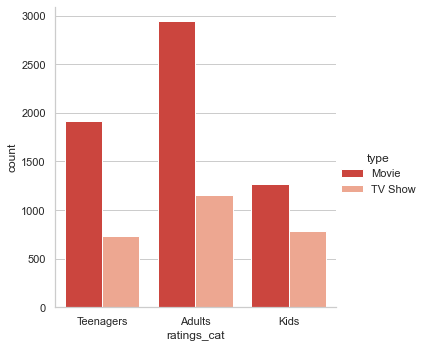

In [80]:
sns.catplot(data=nf_data, kind='count', x='ratings_cat', hue='type', palette="Reds_r")

In [81]:
# The above graph shows which category content is uploading most


Text(0.5, 1.0, 'Content available at Netflix based on the Maurity level ')

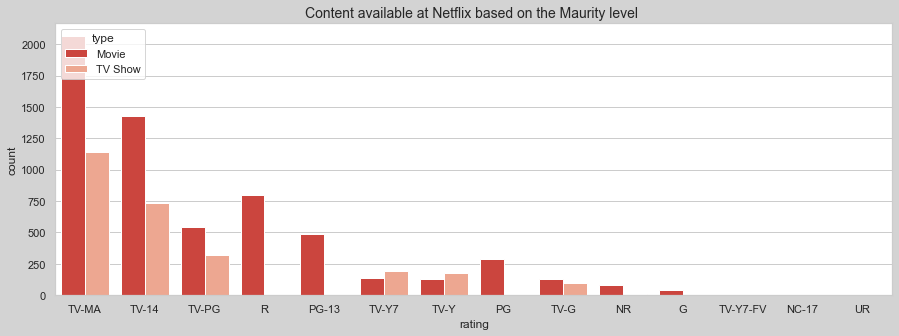

In [82]:
# Content available at Netflix based on the Maurity level

fig = plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=nf_data,x = 'rating',hue = 'type',palette ="Reds_r",
              order = nf_data['rating'].value_counts().index[0:15])
plt.title('Content available at Netflix based on the Maurity level ', fontsize=14)